
***
# **Control de inventario en la industria de calzado con demanda aleatoria**
***
## Alumno: *Ulises Eduardo Ordoñez Cardona*
### Carrera: *Actuaria*
#### Materia: *Procesos Estocásticos*
##### Docente: *Jesús E. Batta*
***


## Introducción

***
En la actualidad todas las empresas ya sean grandes, medianas o pequeñas deberían tener una cultura de almacenamiento de sus datos para poder ser analizados o vendidos para mejorar su negocio, lamentablemente hay muchas empresas sobre todo medianas y pequeñas que carecen de esta cultura.
***
La necesidad de las empresas de poder mantener mercancías almacenadas con el objetivo de poder satisfacer la posible demanda en un determinado tiempo puede ocasionar algunos problemas y sobre todo si no tiene un control de sus datos sobre la demanda que tiene su producto ademas no solo se trata de tener lleno de mercancías si no más bien de tener un número adecuado de esta para poder minimizar los costos de almacenamiento y satisfacer toda o gran parte de la demanda solicitada.
***
    
 </div>

## Pregunta de investigación
***
¿Qué nivel de inventario es óptimo tener y en que momento restablecerse de un producto particular en una empresa de calzado con una demanda aleatoria modelizada con una Cadena de Markov ?
***


## Descripción del fenomeno
***
#### Demanda aleatoria del producto  

La demanda en la industria del calzado de acuerdo con los comentarios de varios empresarios de medianas y pequeñas empresas concuerda que dicha demanda sigue varias características como:
 1. En promedio se venden alrededor de 8 a 12 pares del calzado estrella de la empresa.
 2. Hay algunos días en los cuales la demanda puede ser 0 en un día.
 3. Hay algunos días en los cuales la demanda puede llegar hasta un 50 o 60 pares en un día.

Tomando en cuenta estas características la demanda puede ser modelada por una distribución Poisson con una $\lambda $ en un rango de 5 a 10, el problema de esta distribución, como se muestra en la imagen de abajo, caí muy rápidamente y no podríamos tener días con demanda de 40 0 50 pares.

**Puedes extender un poco este supuesto (que la distribución de la demanda es una distribución de Poisson)?**


Una distribución muy parecida a la de Poisson es la Exponencial, la cual es para números continuos en diferencia a la de Poisson, esta distribución se extiende un poco más en los rangos de valores que puede tener el problema de esta distribución es que los valores más comunes siempre están en torno a los primeros datos.


![Texto alternativo](1.jpg)

Tomando en cuenta lo anterior la mejor manera de modelar la demanda puede ser una combinación de las dos distribuciones mencionadas anteriormente. Tomaremos una distribución exponencial con una $\lambda = 0.2 $, después tomaremos al azar el 90% de los datos de dicha distribución y le sumaremos un número que sigue una distribución Poisson con $\lambda = 5 $, de esta forma, conseguiremos una distribución muy parecida a la mencionada por los empresarios como la que se muestra a continuación:

![Texto alternativo](2.jpg)
***

***
#### Descripcion del tiempo

La demanda que se quiere satisfacer en este problema es la demanda $diaria$ que tiene la empresa de su producto estrella por lo cual el tiempo de la demanda será diario ($i$) y el almacén será monitoreado de la misma forma durante un periodo de $n$ dias. 
***

***
#### Descripcion del reabastecimiento del almacen  

La forma de reabastecer el almacén será cuando al cierre del día el almacén tenga un nivel igual o menor a $Li$ en ese caso el pedido se realiza al final del día y se recibe en la mañana del día siguiente antes de la apertura. De esta manera, ese día el almacén abrirá con su nivel máximo definido $k = 50$ unidades por el momento.
El modelo aceptara los valores negativos para el nivel del almacén los cuales representaran la demanda no satisfecha en $i$  la cual ya no puede ser satisfecha en posteriores $i$.
***


### Caracterisitcas del modelo 

***
El modelo consta de una variable aleatoria: $D_i \in \{0, \infty\}$ que representa la demanda del producto en un día $i$.
***
***
Por lo tanto, el nivel del almacén al final del periodo $i$ estará representado por: $X_i = X_{i-1} - D_i $

Por lo tanto, $X_i$ puede tomar los siguientes valores:
 1. $X_i<0$, representa que la $D_i$ no fue satisfecha por completo.
 2. $X_i=0$, representa que la $D_i$ fue satisfecha por completo pero el $X_i$ quedo vacío.
 3. $X_i>0$, representa que la $D_i$ fue satisfecha por completo.
***
***
El Límite inferior $Li$ para empezar será de 8 unidades para el almacén lo cual nos dice que cuando $X_i \leq Li$ se realizara un pedido que llegara el día siguiente al almacén, la cantidad del pedido será: $$K - X_i \quad\mathrm{si}\quad X_i > 0$$ $$K  \quad\mathrm{si}\quad X_i \leq 0$$ 
***
***
La demanda no satisfecha durante n será: $DNS = \sum\limits_{i = 1}^{n} |X_i|\quad\mathrm{si}\quad X_i < 0$ 
***
***
Las probabilidades de transiciones de $X_i$ está definido por: $$P_{rj}= P(X_{i+1}=j | X_i=r)= \left\lbrace\begin{array}{c} P(D_{i+1}=r-j) \quad\mathrm{si}\quad Li < i < K \\P(D_{i+1}=K-j) \quad\mathrm{si}\quad i \leq Li \end{array}\right.$$
***

In [1]:
import random as rdm
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import collections as  coll
import numpy as np
import pandas as pnd

## Semilla Aleatoria

In [2]:
np.random.seed(64475)
rdm.seed(64475)

***
## Creación de la demanda aleatoria
Con una distribución exponencial discreta modificada
***

In [16]:
#variables que se utilizaran#

i=0
n=104
w=0
m=104
demanda = []
a = np.arange(n)
seleccion = np.random.choice(a,m, replace=False)

#Generamos n numeros aleatorios con una distribución exponencial con parametro .2#
#Los numeros seran redondeados a numero enteros#

for i in range(n):  
    y = round(rdm.expovariate(.5))
    demanda.append(y)

    
#Modificamos los n numeros creados en el paso anterior#
#Seleccionaremos m numeros aletorios de los n creados#
#Los seleccionados se les sumara un numero aleatorio con una distribución de poisson con parametro de 5#

#La modificacion es para extender o expandir un poco mas los datos creados con la distribucion exponencial#
    
for w in range(m):
    u = seleccion[w]
    demanda[u] = demanda[u] + np.random.poisson(30)
    
print(demanda)

[34, 28, 34, 32, 30, 35, 35, 28, 30, 34, 32, 21, 21, 32, 33, 35, 46, 31, 38, 32, 36, 21, 36, 30, 26, 40, 33, 31, 30, 40, 34, 33, 38, 30, 42, 45, 28, 19, 35, 29, 28, 30, 36, 27, 33, 38, 32, 27, 27, 30, 30, 33, 34, 37, 28, 32, 23, 34, 26, 34, 37, 42, 35, 39, 23, 32, 39, 25, 25, 35, 26, 32, 36, 31, 31, 34, 28, 21, 32, 40, 35, 33, 27, 40, 35, 34, 30, 38, 42, 23, 22, 40, 34, 34, 35, 26, 32, 35, 23, 39, 28, 40, 33, 28]


## Grafica del comportamiento de la demanda aleatoria

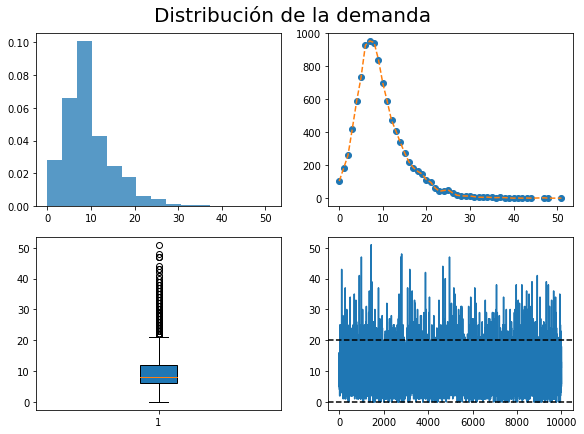

In [6]:
#Ordenamos la demandas de menor a mayor#

demanda2 = pnd.value_counts(demanda).sort_index()

#Creamos las graficos#

fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8,6))
axs[0,0].hist(demanda, bins=15, density=True, alpha=0.75)
axs[0,1].plot(demanda2, 'o', demanda2, '--')
axs[1,0].boxplot(demanda,vert=True,patch_artist=True) 
axs[1,1].plot(demanda)
axs[1,1].axhline(y=20, color="black", linestyle="--")
axs[1,1].axhline(y=0, color="black", linestyle="--")

#Titulo de la Grafica#

fig.suptitle('Distribución de la demanda', fontsize=20)
plt.show()

### La demanda se aproxima a la mencionada por los empresarios y por lo que algunos expertos mencionan.
##### Una demanda en donde hay dias con 0 ventas y dias que alcanzan ventas de hasta 50 pares o un poco mas pero que lo mas común son dias con ventas de 8-12 pares.

**Puedes explicar esta parte de la demanda describiendo como obtuviste esta información con empresarios y expertos. También, en todo caso, puedes explicar como las variaciones en el parámetro $\lambda$ afectan los resultados de tu modelo. Cualquiera de esos dos caminos son válidos**

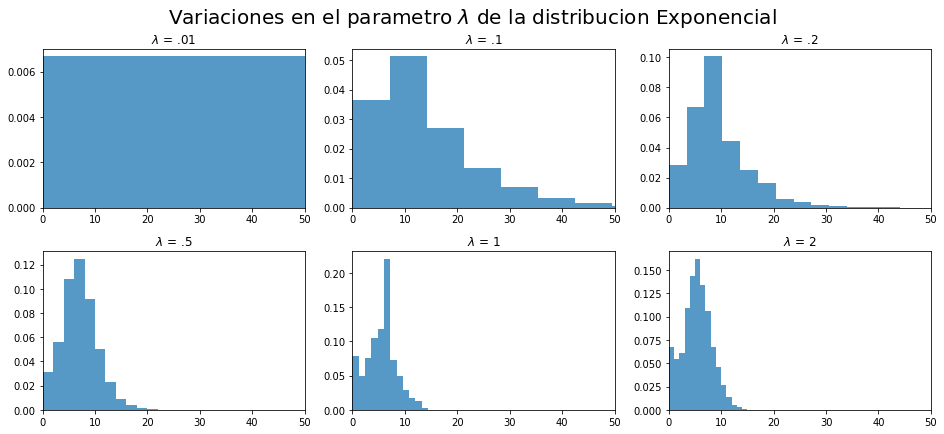

In [7]:
i=0
n=10000
w=0
m=9000
demanda1 = []
demanda2 = []
demanda3 = []
demanda4 = []
demanda5 = []
demanda6 = []
a = np.arange(n)
seleccion = np.random.choice(a,m, replace=False)

for i in range(n):  
    y = round(rdm.expovariate(.01))
    demanda1.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda1[u] = demanda1[u] + np.random.poisson(5)
    
for i in range(n):  
    y = round(rdm.expovariate(.1))
    demanda2.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda2[u] = demanda2[u] + np.random.poisson(5)
    
for i in range(n):  
    y = round(rdm.expovariate(.2))
    demanda3.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda3[u] = demanda3[u] + np.random.poisson(5)

for i in range(n):  
    y = round(rdm.expovariate(.5))
    demanda4.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda4[u] = demanda4[u] + np.random.poisson(5)
    
for i in range(n):  
    y = round(rdm.expovariate(1))
    demanda5.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda5[u] = demanda5[u] + np.random.poisson(5)
    
for i in range(n):  
    y = round(rdm.expovariate(2))
    demanda6.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda6[u] = demanda6[u] + np.random.poisson(5)
    
#Creamos las graficas#

fig, axs = plt.subplots(nrows=2, ncols=3, constrained_layout=True, figsize=(13,6))

axs[0,0].hist(demanda1, bins=15, density=True, alpha=0.75)
axs[0,1].hist(demanda2, bins=15, density=True, alpha=0.75)
axs[0,2].hist(demanda3, bins=15, density=True, alpha=0.75)
axs[1,0].hist(demanda4, bins=15, density=True, alpha=0.75)
axs[1,1].hist(demanda5, bins=15, density=True, alpha=0.75)
axs[1,2].hist(demanda6, bins=15, density=True, alpha=0.75)

axs[0,0].set_title("$\lambda$ = .01")
axs[0,1].set_title("$\lambda$ = .1")
axs[0,2].set_title("$\lambda$ = .2")
axs[1,0].set_title("$\lambda$ = .5")
axs[1,1].set_title("$\lambda$ = 1")
axs[1,2].set_title("$\lambda$ = 2")

axs[0,0].set_xlim([0,50])
axs[0,1].set_xlim([0,50])
axs[0,2].set_xlim([0,50])
axs[1,0].set_xlim([0,50])
axs[1,1].set_xlim([0,50])
axs[1,2].set_xlim([0,50])


fig.suptitle('Variaciones en el parametro $\lambda$ de la distribucion Exponencial', fontsize=20)
plt.show()

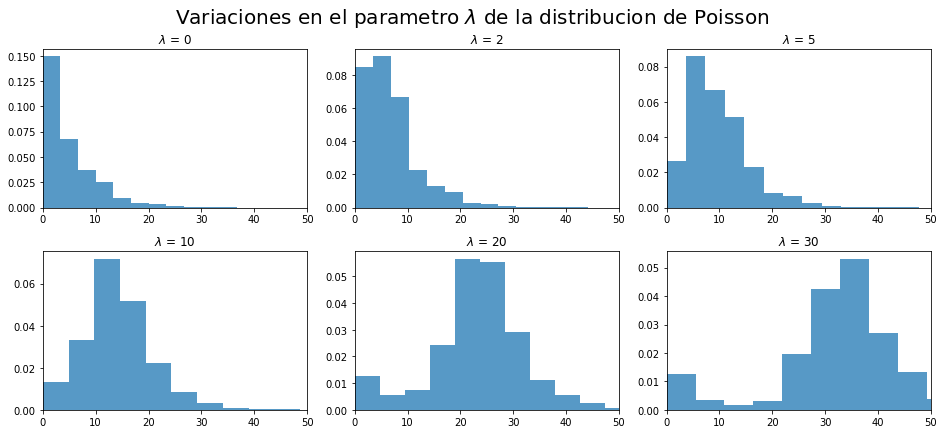

In [8]:
i=0
n=10000
w=0
m=9000
demanda1 = []
demanda2 = []
demanda3 = []
demanda4 = []
demanda5 = []
demanda6 = []
a = np.arange(n)
seleccion = np.random.choice(a,m, replace=False)

for i in range(n):  
    y = round(rdm.expovariate(.2))
    demanda1.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda1[u] = demanda1[u] + np.random.poisson(0)
    
for i in range(n):  
    y = round(rdm.expovariate(.2))
    demanda2.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda2[u] = demanda2[u] + np.random.poisson(2)
    
for i in range(n):  
    y = round(rdm.expovariate(.2))
    demanda3.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda3[u] = demanda3[u] + np.random.poisson(5)

for i in range(n):  
    y = round(rdm.expovariate(.2))
    demanda4.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda4[u] = demanda4[u] + np.random.poisson(10)
    
for i in range(n):  
    y = round(rdm.expovariate(.2))
    demanda5.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda5[u] = demanda5[u] + np.random.poisson(20)
    
for i in range(n):  
    y = round(rdm.expovariate(.2))
    demanda6.append(y)
    
for w in range(m):
    u = seleccion[w]
    demanda6[u] = demanda6[u] + np.random.poisson(30)
    
#Creamos las graficas#

fig, axs = plt.subplots(nrows=2, ncols=3, constrained_layout=True, figsize=(13,6))

axs[0,0].hist(demanda1, bins=15, density=True, alpha=0.75)
axs[0,1].hist(demanda2, bins=15, density=True, alpha=0.75)
axs[0,2].hist(demanda3, bins=15, density=True, alpha=0.75)
axs[1,0].hist(demanda4, bins=15, density=True, alpha=0.75)
axs[1,1].hist(demanda5, bins=15, density=True, alpha=0.75)
axs[1,2].hist(demanda6, bins=15, density=True, alpha=0.75)

axs[0,0].set_title("$\lambda$ = 0")
axs[0,1].set_title("$\lambda$ = 2")
axs[0,2].set_title("$\lambda$ = 5")
axs[1,0].set_title("$\lambda$ = 10")
axs[1,1].set_title("$\lambda$ = 20")
axs[1,2].set_title("$\lambda$ = 30")

axs[0,0].set_xlim([0,50])
axs[0,1].set_xlim([0,50])
axs[0,2].set_xlim([0,50])
axs[1,0].set_xlim([0,50])
axs[1,1].set_xlim([0,50])
axs[1,2].set_xlim([0,50])


fig.suptitle('Variaciones en el parametro $\lambda$ de la distribucion de Poisson', fontsize=20)
plt.show()

***
### Determinar comportamiento del Almacen
Con capacidad maxima de 50 unidades y un limite inferior del 8 unidades 
***

In [9]:
np.random.seed(None)
rdm.seed(None)

#Variables que se utilizaran#

t = 0
K = 50
Li= 8
cantidadPedido = 0
almacen = K
almacenFinal = [K]
pedidos = []

#Creación de una cadena de Inventarios#
#Ciclo en donde vamos restando la demanda al almacen y surtir en caso ser necesario#

while(t<n):
    if(almacen<Li):
        if(almacen<0):
            cantidadPedido = K
            almacen = cantidadPedido
            almacen = almacen - demanda[t]
            pedidos.append(cantidadPedido)
        else:
            cantidadPedido = (K-almacen)
            almacen = almacen + cantidadPedido
            almacen = almacen - demanda[t]
            pedidos.append(cantidadPedido)
    else:
        almacen = almacen - demanda[t]
        almacen = almacen
    t= t+1
    almacenFinal.append(almacen)
    

## Grafica del comportamiento del almacen

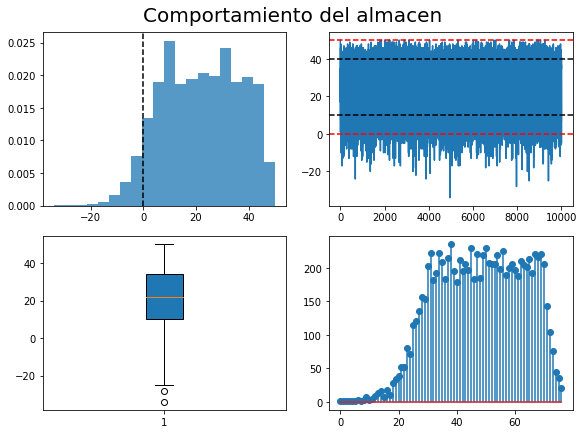

In [10]:
#ordenar el almacen de menor a mayor#

almacenFinal2 = pnd.value_counts(almacenFinal).sort_index()

#Creamos las graficas#
fig, axs = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(8,6))
axs[0,0].hist(almacenFinal, bins=20, density=True, alpha=0.75)
axs[0,0].axvline(x=0, color="black", linestyle="--")
axs[1,1].stem(almacenFinal2)
axs[1,0].boxplot(almacenFinal,vert=True,patch_artist=True) 
axs[0,1].plot(almacenFinal)
axs[0,1].axhline(y=50, color="red", linestyle="--")
axs[0,1].axhline(y=0, color="red", linestyle="--")
axs[0,1].axhline(y=40, color="black", linestyle="--")
axs[0,1].axhline(y=10, color="black", linestyle="--")

#Titulo del Grafico#

fig.suptitle('Comportamiento del almacen', fontsize=20)
plt.show()

### El almacen se comporta de una manera donde la mayoria de las veces se encuentra entre un valor de 40 a 10 con una mediana cercana a 20, aunque hay dias en donde el almacen es negativo lo que quiere decir que la demanda de ese dia no se cubrio del todo teniendo hasta un dia en donde hubo demandas de un poco mas de 20 que no fueron cubiertas.

***
## Matriz de Probabilidades
***

In [12]:
Probabilidad = matrizProbabilidad
i=0
for i in range(100):

    np.random.seed(None)
    rdm.seed(None)

    #variables que se utilizaran#

    i=0
    n=10000
    w=0
    m=9000
    demanda = []
    a = np.arange(n)
    seleccion = np.random.choice(a,m, replace=False)

    #Generamos n numeros aleatorios con una distribución exponencial con parametro .2#
    #Los numeros seran redondeados a numero enteros#

    for i in range(n):  
        y = round(rdm.expovariate(.2))
        demanda.append(y)


    #Modificamos los n numeros creados en el paso anterior#
    #Seleccionaremos m numeros aletorios de los n creados#
    #Los seleccionados se les sumara un numero aleatorio con una distribución de poisson con parametro de 5#

    #La modificacion es para extender o expandir un poco mas los datos creados con la distribucion exponencial#

    for w in range(m):
        u = seleccion[w]
        demanda[u] = demanda[u] + np.random.poisson(5)
        
    #Variables que se utilizaran#

    t = 0
    K = 50
    Li= 12
    cantidadPedido = 0
    almacen = K
    almacenFinal = [K]
    pedidos = []

    #Creación de una cadena de Inventarios#
    #Ciclo en donde vamos restando la demanda al almacen y surtir en caso ser necesario#

    while(t<n):
        if(almacen<Li):
            if(almacen<0):
                cantidadPedido = K
                almacen = cantidadPedido
                almacen = almacen - demanda[t]
                pedidos.append(cantidadPedido)
            else:
                cantidadPedido = (K-almacen)
                almacen = almacen + cantidadPedido
                almacen = almacen - demanda[t]
                pedidos.append(cantidadPedido)
        else:
            almacen = almacen - demanda[t]
            almacen = almacen
        t= t+1
        almacenFinal.append(almacen)

    almacenFinal

    #Variables que se utilizaran#

    transiciones = []

    #Ciclo donde obtenemos los diferentes pasos del almacen del tiempo i al tiempo i+1#

    for i in range(1, len(almacenFinal)):
        if(almacenFinal[i]<0):
            transiciones.append(str(almacenFinal[i-1])+ "-" + str(0))
        else:
            if(almacenFinal[i-1]<0):
                transiciones.append(str(0)+ "-" + str(almacenFinal[i]))
            else:
                transiciones.append(str(almacenFinal[i-1])+ "-" + str(almacenFinal[i]))

    u= coll.Counter(transiciones)

    #Variables que se utilizaran#  

    i=0
    ciclo0= []
    uno = []
    ciclo = []

    #Vector con numeros del 0 al 50#

    while(i<51):
        uno.append(i)
        i=i+1

    #Variables que se utilizaran# 

    i=0
    l=0

    #Vector con todos los movimientos posibles del estado i al estado i+1#

    while(i<51):
        while(l<51):
            ciclo.append(str(uno[i]) + ('-') + str(uno[l]))
            l=l+1
        l=0
        i=i+1

    #Variables que se utilizaran# 

    i=0
    rep= []

    #Ciclo donde obtenemos los diferentes pasos del almacen del tiempo i al tiempo i+1#

    while(i<2601):
        rep.append(u[ciclo[i]])
        i=i+1

    #Variables que se utilizaran# 

    i=0
    datos=[]
    repeticion=[]

    #Matriz con el numero de pasos del almacen del tiempo i al tiempo i+1 con su respectivo paso#

    while(i<2601):
        repeticion= [ciclo[i],rep[i]]
        datos.append(repeticion)
        i=i+1

    datos=np.matrix(datos)


    #Variables que se utilizaran# 

    i=0
    l=0
    total=[]
    tota=0
    ttl=0

    #Ciclo donde obtenemos los totales de todos los posibles pasos para un periodo i determinado#

    while(i<2601):
        while(l<51):
            ttl = int(datos[i,1])
            tota = ttl + tota
            l =l+1
            i=i+1
        l=0
        total.append(tota)
        tota=0

    #Variables que se utilizaran# 

    x=0
    i=0
    l=0
    pro=0
    probabilidad=[]

    #Ciclo donde se obtiene las probabilidades de todos los pasos#

    while(i<2601):
        while(l<51):
                if(total[x]==0):
                    pro=0
                    probabilidad.append(pro)
                    l=l+1
                    i=i+1
                else:
                    pro = round(((int(datos[i,1]))/total[x]),3)
                    probabilidad.append(pro)
                    l=l+1
                    i=i+1
        x=x+1
        l=0

    #Creación de la matriz de probabilidades#

    lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)] 
    matrizProbabilidad =np.matrix(lol(probabilidad,51))

    Probabilidad = Probabilidad + matrizProbabilidad

In [13]:
matrizProbabilidad = Probabilidad/100

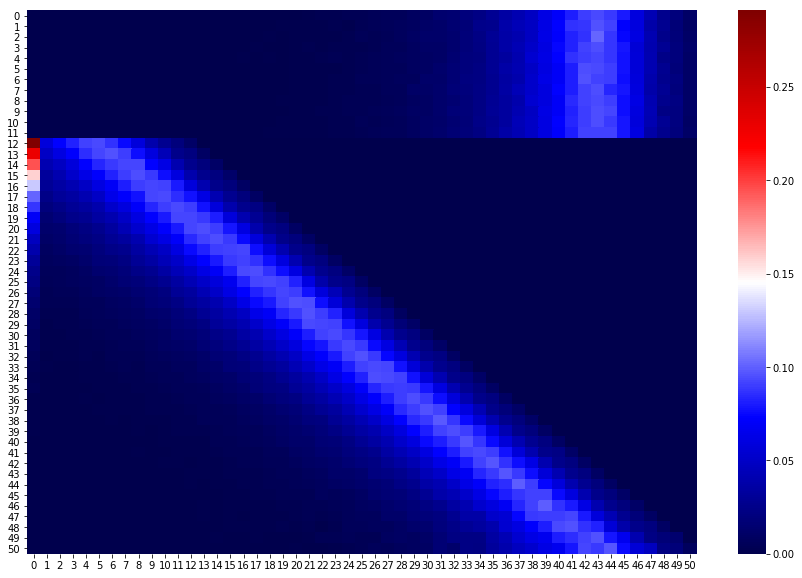

In [14]:
#Grafico#

plt.figure(figsize=(15,10))
sns.heatmap(matrizProbabilidad, cmap="seismic")

### La matriz de Probabilidades muestra que con valores del almacen menores a 14 la probabilidad de que el paso siguiente sea cero son altas, ademas que se ve la linea marcada por el limite inferior (8) y que lo mas probable estando en un periodo i el estado i+1 se reduzca el inventario en un rango de 5 a 15 unidades.

**Podrías obtener un promedio de varias simulaciones del proceso? para que los resultados de tu matriz de probabilidad no tengan efectos muestrales.**

## Probabilidad del almacen en 0

c:\users\0303u\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
c:\users\0303u\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
c:\users\0303u\appdata\local\programs\python\python37-32\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating a

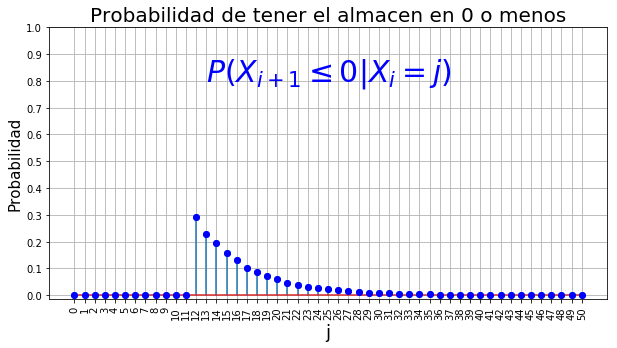

In [15]:
data = matrizProbabilidad[0:,0]
plt.figure(figsize=(10,5))
plt.stem(data)
plt.plot(data,  'bo')
plt.xticks(uno,rotation=90)
plt.yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
plt.title("Probabilidad de tener el almacen en 0 o menos", fontsize=20)
plt.text(13, .8,'$P(X_{i+1} \leq 0 | X_i = j)$', fontsize=30, color='blue')
plt.xlabel("j", fontsize=18)
plt.ylabel("Probabilidad", fontsize=15)
plt.grid(True)
plt.show()



### La probabilidad mas alta de pasar a un estado donde el almacen se quede en 0 es: $P(X_{i+1} \leq 0|X_i=8)=0.3$